# **Predictive Analytics: Harga Beras Medium**


---

## **Deskripsi Proyek**

### **Deskripsi Latar Belakang Proyek Prediksi Harga Beras Medium dengan Machine Learning**


Sektor perdagangan pangan memainkan peran vital dalam kestabilan ekonomi daerah. Kabupaten Sumedang secara rutin mengumpulkan data harga barang pokok seperti beras, gula, dan minyak dari berbagai pasar tradisional. Salah satu komoditas utama yang sangat dipantau harganya adalah Beras Medium, karena menjadi kebutuhan dasar sebagian besar masyarakat.

Namun, harga beras kerap mengalami fluktuasi yang dapat mempengaruhi daya beli masyarakat dan kebijakan pemerintah daerah. Oleh karena itu, kemampuan untuk memprediksi harga Beras Medium di masa depan menggunakan pendekatan Machine Learning dapat memberikan nilai tambah yang signifikan bagi pengambil kebijakan dan pelaku pasar.

## **1. Import Library yang Dibutuhkan**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

## **2. Data Understanding**


Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut.

### 2.1 Data Loading



Data Loading merupakan tahap untuk memuat dataset yang akan digunakan dalam proyek. Dataset ini berisi informasi harga komoditas pasar tradisional di Kabupaten Sumedang yang dikumpulkan oleh Dinas Koperasi, UKM, Perdagangan, dan Perindustrian. Dataset mencakup data historis dari berbagai pasar, tanggal pencatatan, serta rincian barang yang dijual seperti nama barang, satuan, dan harga.

In [2]:
# Load data
df = pd.read_csv("https://raw.githubusercontent.com/sendhy12/datasetd/refs/heads/main/data_produk_pasar.csv", sep=';')

In [3]:
# Filter hanya Beras Medium
df = df[df['item_barang'] == 'Beras Medium']

### **2.2 Exploratory Data Analysis (EDA)**

Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi.

#### **2.2.1 EDA - Deskripsi Variabel**

In [4]:
df

,id,satuan,pasar,tanggal,nama_item,keterangan,harga,jumlah,kebutuhan,item_barang,satuan_item,nama_pasar
1,26767,NaN,7,2022-01-01,2,cukup,11500,0,0,Beras Medium,kg,Pasar Parakanmuncang
35,26801,NaN,7,2022-01-02,2,cukup,11500,0,0,Beras Medium,kg,Pasar Parakanmuncang
71,26838,NaN,5,2022-01-01,2,cukup,10000,0,0,Beras Medium,kg,Pasar Darmaraja
72,26839,NaN,5,2022-01-02,2,cukup,10000,0,0,Beras Medium,kg,Pasar Darmaraja
84,26851,NaN,6,2022-01-02,2,cukup,10000,0,0,Beras Medium,kg,Pasar Wado
...,...,...,...,...,...,...,...,...,...,...,...,...
279522,322445,NaN,5,2024-11-19,2,cukup,13000,900,450,Beras Medium,kg,Pasar Darmaraja
279562,322486,NaN,2,2024-11-19,2,cukup,13000,15000,3500,Beras Medium,kg,Pasar Tanjungsari
279635,322561,NaN,4,2024-11-19,2,cukup,13000,30,25,Beras Medium,kg,Pasar Buahdua
279658,322584,NaN,1,2024-11-19,2,cukup,13000,2000,710,Beras Medium,kg,Pasar Inpres


Dataset yang digunakan berisi data harga komoditas di pasar tradisional Kabupaten Sumedang, khususnya komoditas Beras Medium. Deskripsi variabel yang akan digunakan:

| Nama Variabel     | Deskripsi                                                                 |
|-------------------|---------------------------------------------------------------------------|
| `tanggal`         | Tanggal pencatatan harga komoditas                                       |
| `item_barang`     | Nama komoditas, misalnya "Beras Medium"             |
| `harga`           | Harga barang (dalam Rupiah)                                              |
| `nama_pasar`      | Nama pasar tempat pencatatan                                             |
| `bulan`, `tahun`  | Fitur tambahan hasil ekstraksi dari tanggal                              |
| `pasar_encoded`   | Hasil encoding dari nama pasar                                           |

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7630 entries, 1 to 279661
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7630 non-null   int64  
 1   satuan       0 non-null      float64
 2   pasar        7630 non-null   int64  
 3   tanggal      7630 non-null   object 
 4   nama_item    7630 non-null   int64  
 5   keterangan   7630 non-null   object 
 6   harga        7630 non-null   int64  
 7   jumlah       7630 non-null   int64  
 8   kebutuhan    7630 non-null   int64  
 9   item_barang  7630 non-null   object 
 10  satuan_item  7630 non-null   object 
 11  nama_pasar   7630 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 1.0+ MB


Dari eksekusi method `df.info()` terdapat:

- Terdapat 7 kolom numerik dengan tipe data float64 dan int64 yaitu: id, satuan, pasar, nama_item, harga, jumlah, dan kebutuhan.
- Terdapat 5 kolom dengan tipe data object yaitu: tanggal, keterangan, item_barang, satuan_item, dan nama_pasar.

Namun kolom `tanggal` seharusnya bertipe datetime, maka selanjutnya akan dirubah.

In [6]:
# Konversi tanggal
df['tanggal'] = pd.to_datetime(df['tanggal'])
df['tahun'] = df['tanggal'].dt.year
df['bulan'] = df['tanggal'].dt.month

In [7]:
df.describe()

,id,satuan,pasar,tanggal,nama_item,harga,jumlah,kebutuhan,tahun,bulan
count,7630.000000,0.0,7630.000000,7630,7630.0,7630.000000,7630.000000,7630.000000,7630.000000,7630.000000
mean,168854.054522,NaN,6.077064,2023-05-11 06:49:43.800786432,2.0,12067.870249,1954.305111,544.467104,2022.883879,6.219790
min,26767.000000,NaN,1.000000,2022-01-01 00:00:00,2.0,0.000000,0.000000,0.000000,2022.000000,1.000000
25%,93019.500000,NaN,3.000000,2022-08-20 00:00:00,2.0,11000.000000,0.000000,0.000000,2022.000000,3.000000
50%,166001.500000,NaN,5.000000,2023-04-15 00:00:00,2.0,12000.000000,60.000000,30.000000,2023.000000,6.000000
75%,241972.250000,NaN,7.000000,2024-01-27 00:00:00,2.0,13000.000000,950.000000,550.000000,2024.000000,9.000000
max,322587.000000,NaN,19.000000,2024-11-19 00:00:00,2.0,18000.000000,24000.000000,6500.000000,2024.000000,12.000000
std,85638.059228,NaN,5.413202,NaN,0.0,1468.309485,5230.960459,1104.819857,0.807385,3.367911


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

In [8]:
df.describe(include='object')

,keterangan,item_barang,satuan_item,nama_pasar
count,7630,7630,7630,7630
unique,4,1,1,9
top,cukup,Beras Medium,kg,Pasar Parakanmuncang
freq,7451,7630,7630,1055


Fungsi `describe(include='object')` memberikan informasi statistik deskriptif pada kolom bertipe objek (biasanya berupa teks atau kategori), antara lain:
- `Count` adalah jumlah entri non-null (tidak kosong) pada kolom tersebut.
- `Unique` adalah jumlah nilai unik (berbeda) yang terdapat pada kolom.
- `Top` adalah nilai yang paling sering muncul (modus) dalam kolom.
- `Freq` adalah jumlah kemunculan nilai yang paling sering muncul (frekuensi dari top).

In [9]:
df.shape

(7630, 14)

Dari eksekusi method` df.shape` Terlihat:
<br>

| Jumlah Baris | Jumlah Kolom |
| ------ | ------ |
| 7630 | 14 |


<br>

#### **2.2.2 EDA - Menangani Missing Value dan Outliers**

In [10]:
df.isnull().sum()

,0
id,0
satuan,7630
pasar,0
tanggal,0
nama_item,0
keterangan,0
harga,0
jumlah,0
kebutuhan,0
item_barang,0


In [11]:
df = df.drop('satuan', axis=1)

In [12]:
df.isnull().sum()

,0
id,0
pasar,0
tanggal,0
nama_item,0
keterangan,0
harga,0
jumlah,0
kebutuhan,0
item_barang,0
satuan_item,0


- Variabel `satuan` memiliki banyak missing values tetapi tidak digunakan dalam pemodelan, jadi bisa di-drop.
- Kolom yang digunakan untuk modeling tidak memiliki missing values, sehingga tidak diperlukan imputasi.

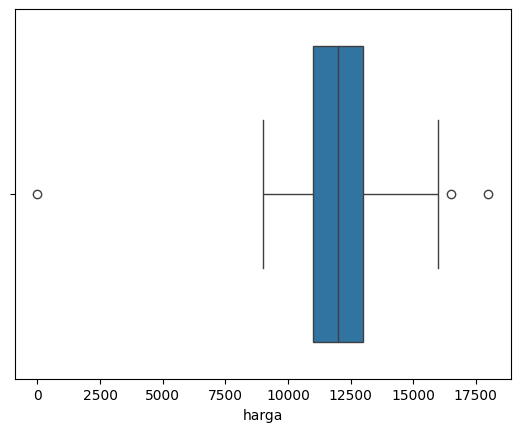

In [13]:
plt.figure()
sns.boxplot(df, x='harga')
plt.show()

*Menghapus outliers yang ada pada dataset*  


Pada kasus ini, kita akan mendeteksi outliers dengan teknik visualisasi data (boxplot). Kemudian, menangani outliers dengan teknik IQR method.


```
IQR = Inter Quartile Range
IQR = Q3 - Q1
```



In [14]:
Q1 = df['harga'].quantile(0.25)
Q3 = df['harga'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['harga'] < (Q1 - 1.5 * IQR)) | (df['harga'] > (Q3 + 1.5 * IQR)))]

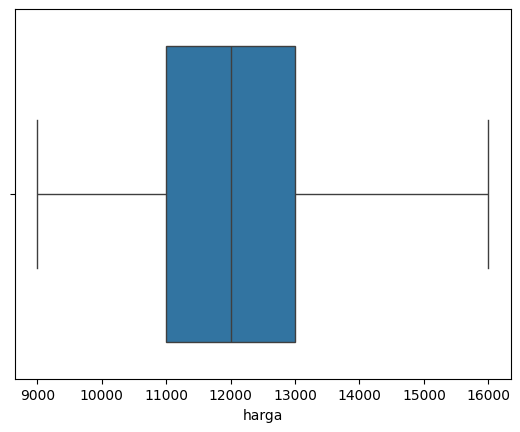

In [15]:
plt.figure()
sns.boxplot(df, x='harga')
plt.show()

In [16]:
df.shape

(7627, 13)

Jumlah Datasets setalah penanganan Missing Value dan Outlier: `7627, 13`

#### **2.2.3 EDA - Univariate Analysis**

Univariate analysis dilakukan untuk memahami distribusi masing-masing fitur:

**Distribusi Harga Beras Medium:**

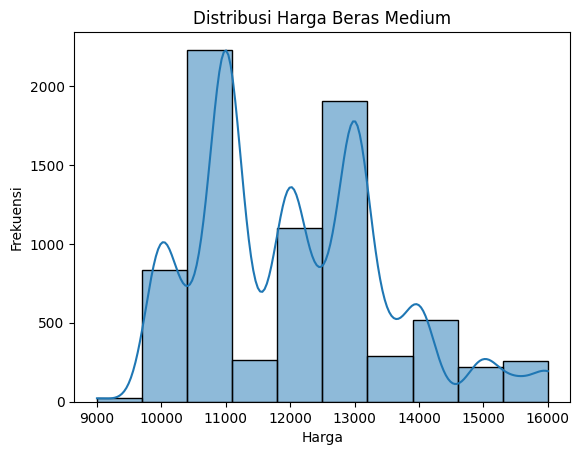

In [17]:
sns.histplot(df['harga'], bins=10, kde=True)
plt.title("Distribusi Harga Beras Medium")
plt.xlabel("Harga")
plt.ylabel("Frekuensi")
plt.show()

**Frekuensi Nama Pasar:**

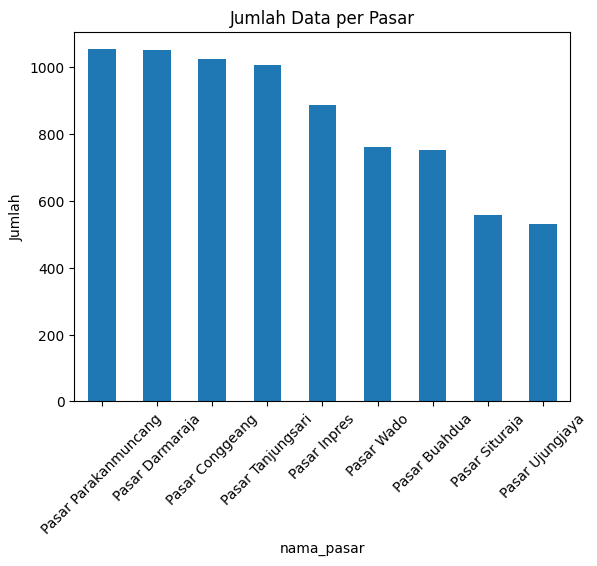

In [18]:
df['nama_pasar'].value_counts().plot(kind='bar')
plt.title("Jumlah Data per Pasar")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

**Distribusi Waktu (Tahun & Bulan):**

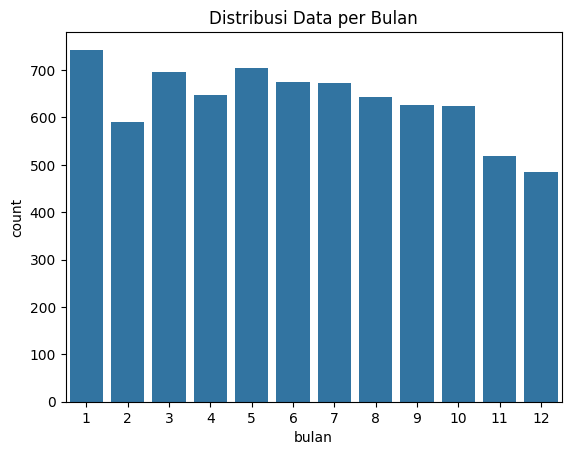

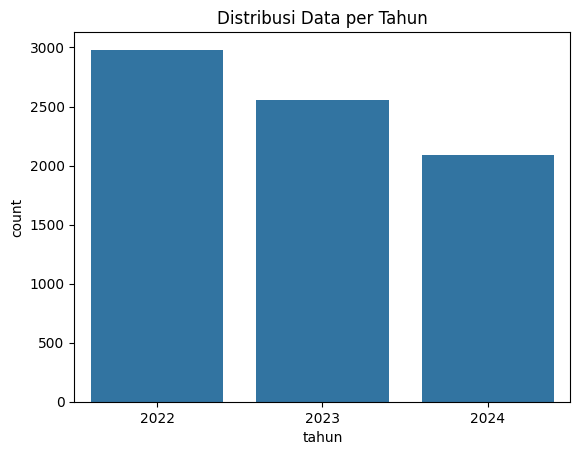

In [19]:
sns.countplot(x='bulan', data=df)
plt.title("Distribusi Data per Bulan")
plt.show()

sns.countplot(x='tahun', data=df)
plt.title("Distribusi Data per Tahun")
plt.show()

#### **2.2.4 EDA - Multivariate Analysis**

Analisis ini dilakukan untuk memahami hubungan antar fitur terhadap harga.

**Harga vs Tahun:**

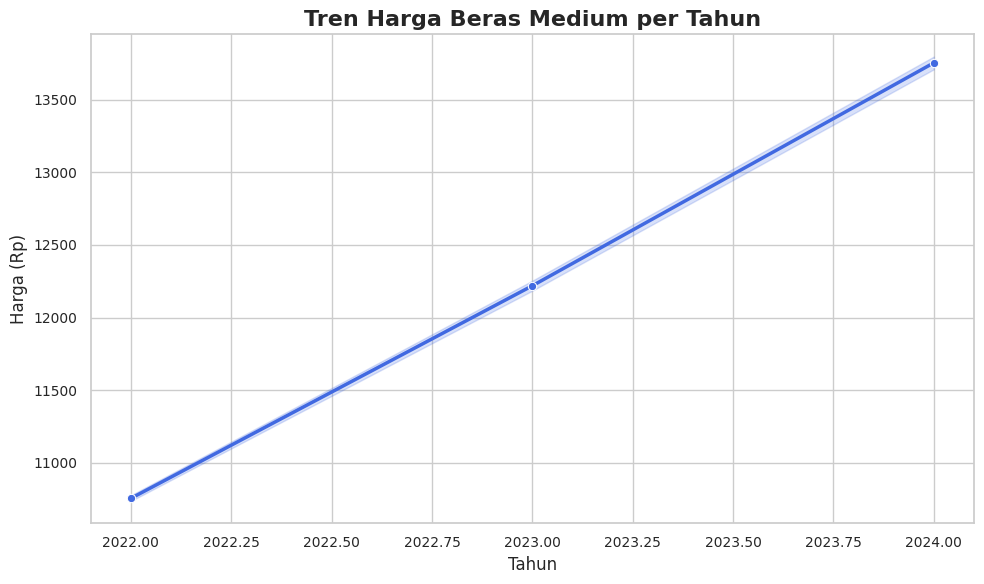

In [37]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.lineplot(x='tahun', y='harga', data=df, marker='o', linewidth=2.5, color='royalblue')
plt.title("Tren Harga Beras Medium per Tahun", fontsize=16, fontweight='bold')
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Harga (Rp)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

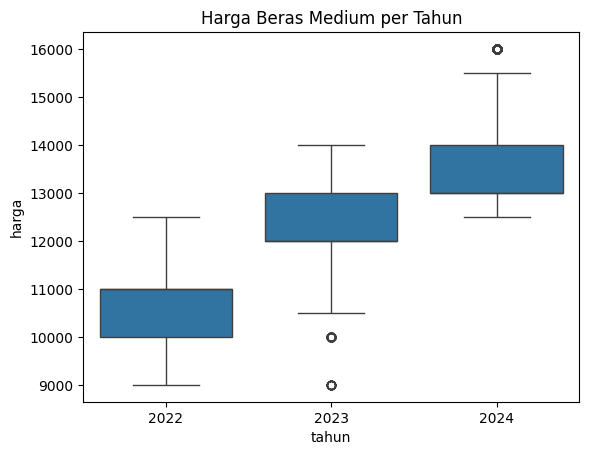

In [20]:
sns.boxplot(x='tahun', y='harga', data=df)
plt.title("Harga Beras Medium per Tahun")
plt.show()

**Harga vs Nama Pasar:**

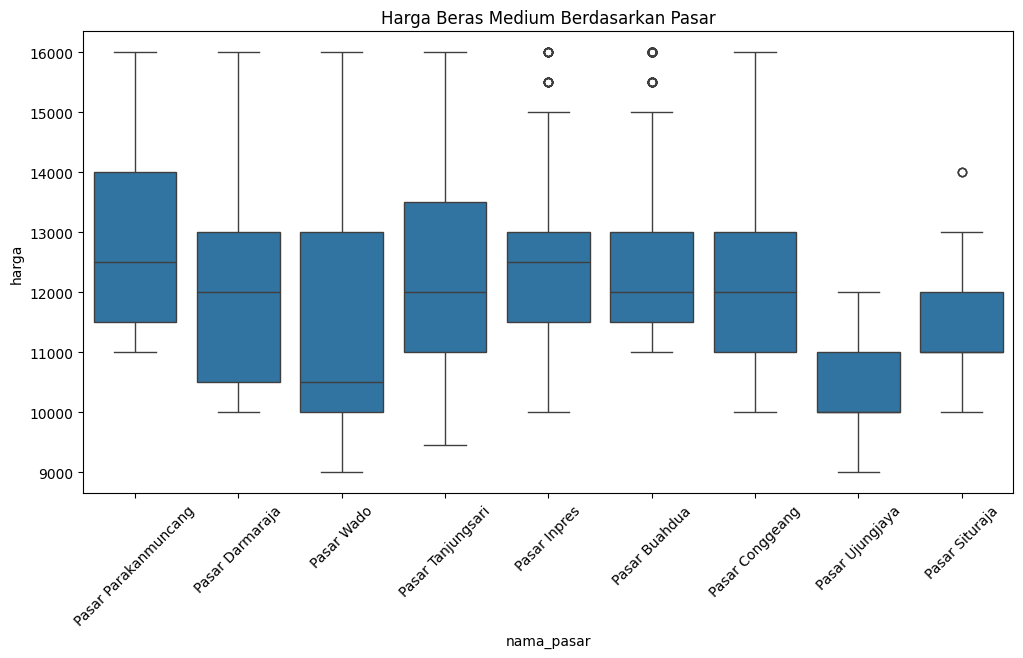

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='nama_pasar', y='harga', data=df)
plt.title("Harga Beras Medium Berdasarkan Pasar")
plt.xticks(rotation=45)
plt.show()

**Korelasi antar fitur numerik:**

In [23]:
# Encode nama pasar
le = LabelEncoder()
df['pasar_encoded'] = le.fit_transform(df['nama_pasar'])

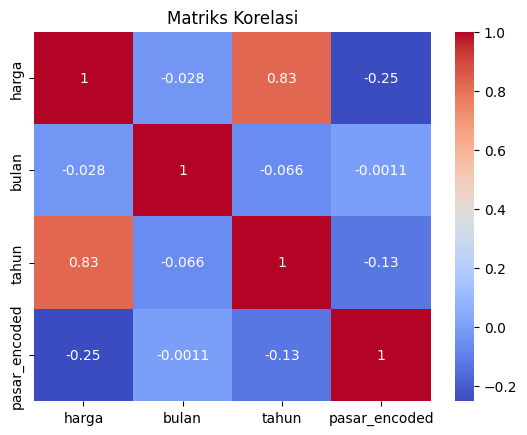

In [24]:
sns.heatmap(df[['harga', 'bulan', 'tahun', 'pasar_encoded']].corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

**Insight:**
- Terdapat variasi harga berdasarkan bulan dan pasar.
- Korelasi waktu (tahun) terhadap harga cukup kuat, kemungkinan dapat berkontribusi sebagai fitur prediktor.

## **3. Data Preparation**

### **3.1 Pemilihan Fitur**

In [25]:
X = df[['tahun', 'bulan', 'pasar_encoded']]
y = df['harga']

### **3.2 Split Data**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print(f'Total datasets: {len(X)}')
print(f'Total data Latih: {len(X_train)}')
print(f'Total data Uji: {len(X_test)}')

Total datasets: 7627
Total data Latih: 6101
Total data Uji: 1526


### **3.3 Normalisasi (Khusus untuk Linear Regresi)**

In [28]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled_ = scaler.transform(X_test)

## **4. Model Development**

### **4.1 Linear Regression**

In [29]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
y_pred_lr = lr.predict(X_test_scaled_)

### **4.2 Decision Tree**

In [31]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [32]:
y_pred_dt = dt.predict(X_test)

### **4.3 Random Forest**

In [33]:
rf = RandomForestRegressor(n_estimators=100, max_depth=7)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7)

In [34]:
y_pred_rf = rf.predict(X_test)

## **5. Evaluasi Model**

### **5.1 Score Model**

In [35]:
# Evaluasi dan simpan dalam DataFrame
results = []
models = [("Linear Regression", lr, y_pred_lr),
          ("Decision Tree", dt, y_pred_dt),
          ("Random Forest", rf, y_pred_rf)]

for name, model, y_pred in models:
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)
    results.append([name, mae, mse, rmse, r2])

eval_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2"])

# Tampilkan tabel evaluasi
eval_df

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,624.223860,630262.504249,793.890738,0.702371
1,Decision Tree,257.024631,168816.392204,410.872720,0.920280
2,Random Forest,152.400377,89048.070888,298.409234,0.957949


### **5.2 plot Model**

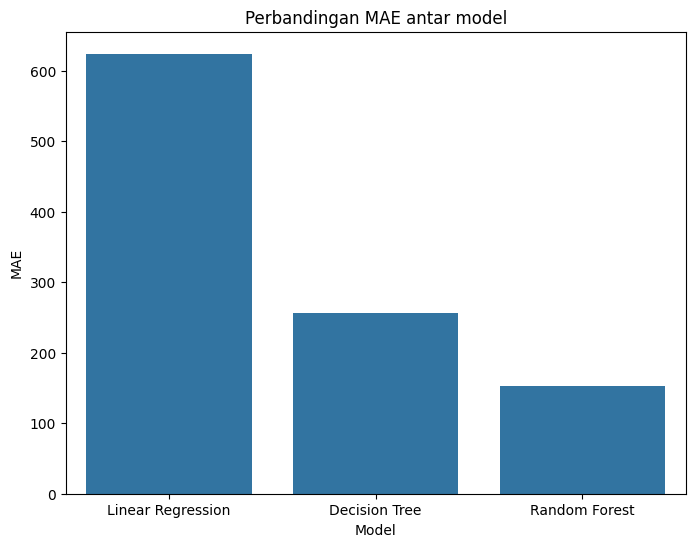

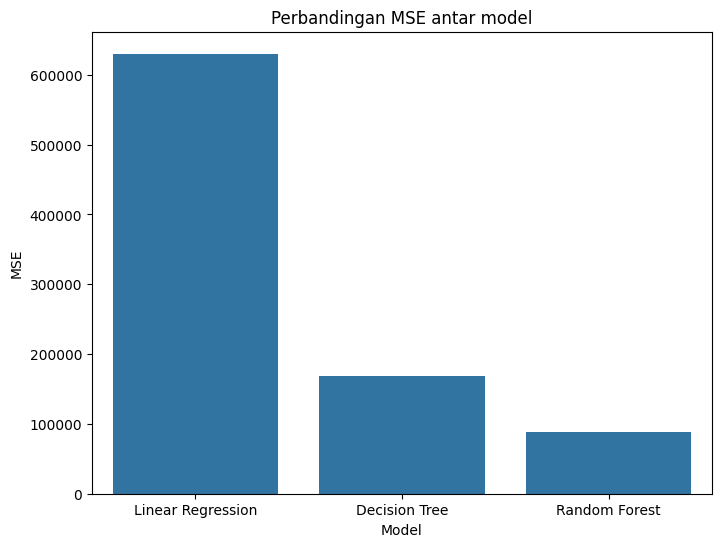

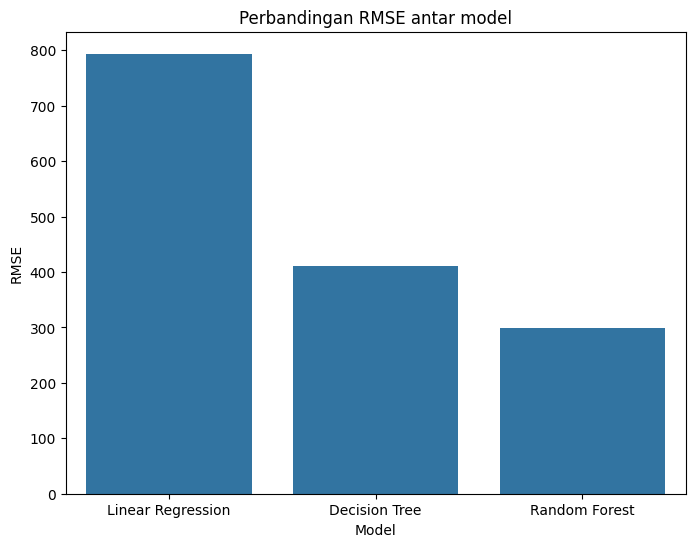

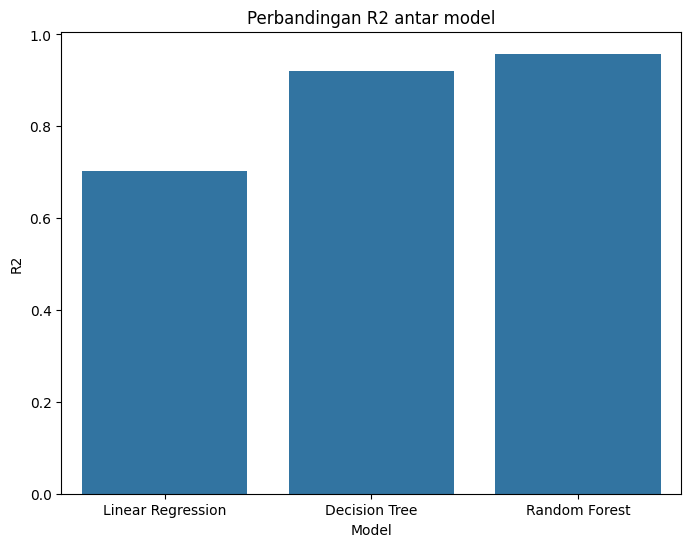

In [36]:
import matplotlib.pyplot as plt
metrics = ["MAE", "MSE", "RMSE", "R2"]
for metric in metrics:
  plt.figure(figsize=(8, 6))
  sns.barplot(x='Model', y=metric, data=eval_df)
  plt.title(f'Perbandingan {metric} antar model')
  plt.show()

**Insight dari Evaluasi Model Prediksi Harga Beras Medium**

1. **Model dengan Performa Terbaik:**
   - Berdasarkan metrik evaluasi, model **Random Forest** menunjukkan performa terbaik dibandingkan model lainnya.
   - Hal ini terlihat dari nilai **R² tertinggi**, yang mendekati 1, menandakan bahwa model mampu menjelaskan proporsi variasi terbesar dari harga beras.

2. **Tingkat Error:**
   - **MAE (Mean Absolute Error)** dan **RMSE (Root Mean Squared Error)** untuk Random Forest juga yang paling kecil di antara ketiga model.
   - Ini berarti rata-rata kesalahan prediksi model tersebut terhadap harga aktual relatif lebih kecil, menjadikannya lebih andal.